In [1]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [2]:
import pandas as pd
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

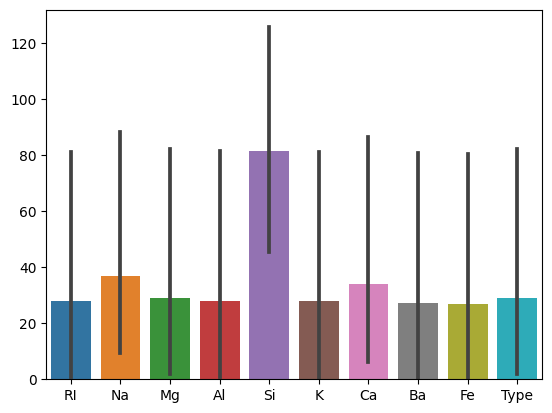

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(df.describe())

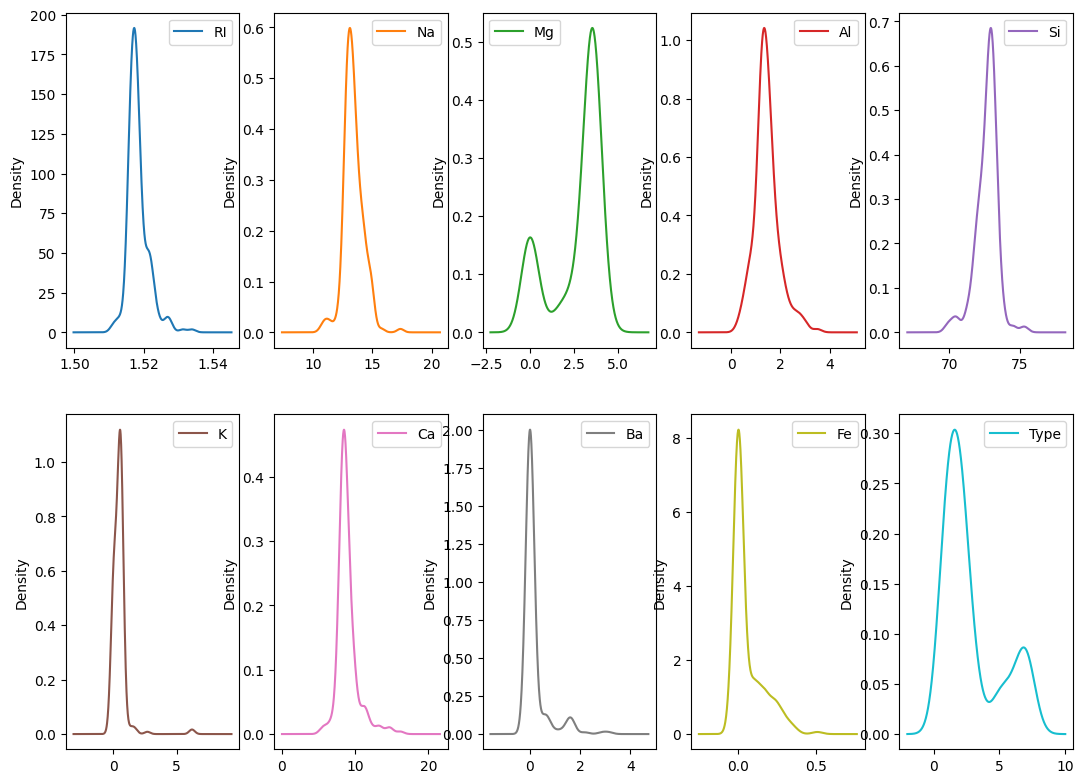

In [14]:
df.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

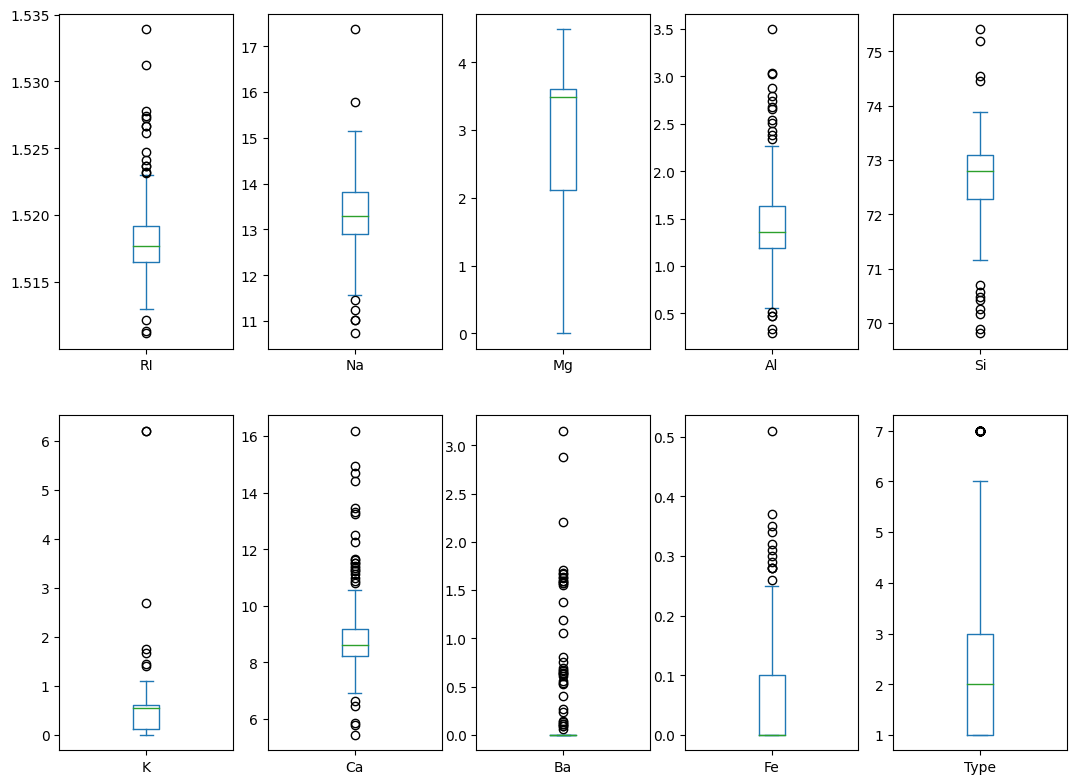

In [16]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

Correlation Between Variables

In [17]:
cor = df.corr(method='pearson')

In [18]:
cor.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


As seen in the above graph, there is high correlation exists between some of the variables. We can use PCA to reduce the highly correlated variables

KNN

In [20]:
import numpy as np
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [24]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []
from sklearn.neighbors import KNeighborsClassifier

In [25]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

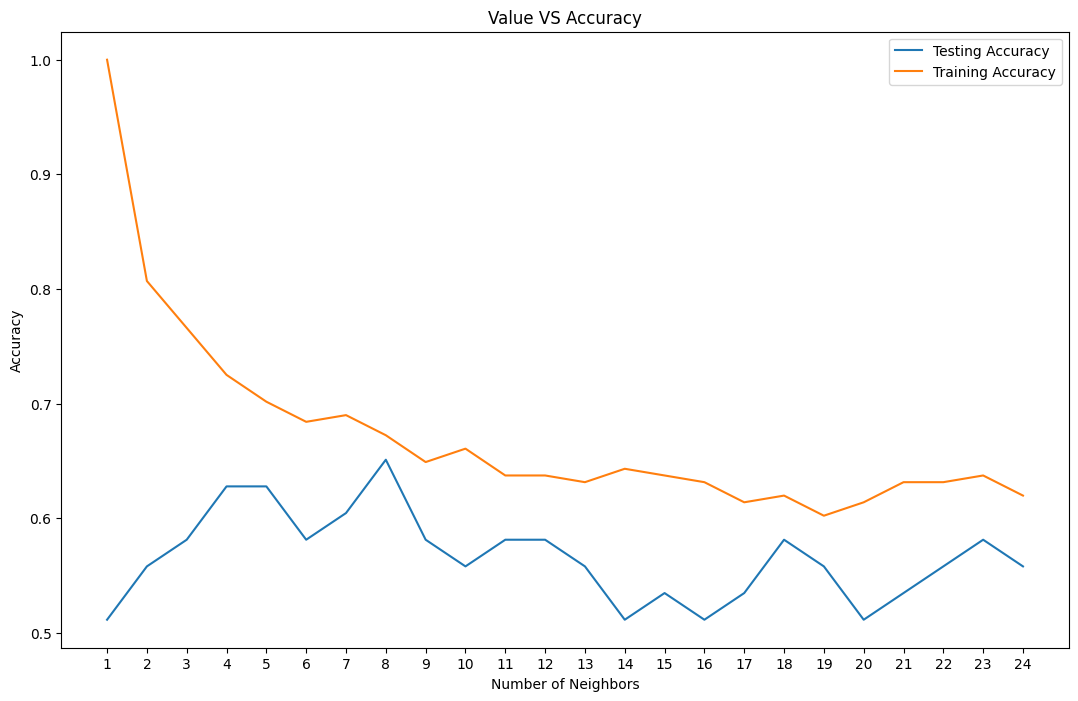

In [27]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

k=4 produces the most accurate results

In [33]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [34]:
scores = []
cv_scores = []
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [35]:
score_knn=cross_val_score(knn, X,y, cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [36]:
score_knn.mean()

0.6127705627705629

In [37]:
score_knn.std()*2

0.23547117559816877

In [38]:
cv_score = score_knn.mean()

In [39]:
cv_scores.append(cv_score)
cv_scores

[0.6127705627705629]

Support Vector Machine Accuracy: nearly 60% (61.2%)